In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
import seaborn as sns

import netket as nk
import os
os.environ["JAX_PLATFORM_NAME"] = "cpu"

PATH = os.getcwd()

### Symmetry Testing

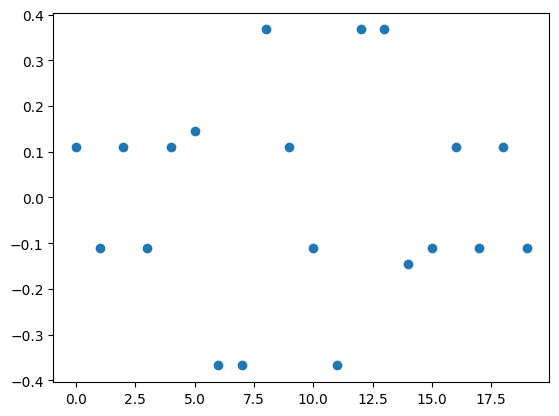

In [30]:
a = 2
b = 3

H = sparse.load_npz(PATH + '/data/'+str(a)+'x'+str(b)+'hamiltonian.npz')

numEnergies = 1
energies, states = sparse.linalg.eigs(H.asfptype(), k=numEnergies, which='SR')
energies = np.real(energies)
states = np.real(states)

sortedStates = np.sort(states,axis=0)
plt.scatter(range(len(states)),states)

6 [-0.4285461, -0.13612114, -0.06193816, -0.044672396, 0.03854987, 0.12999819]


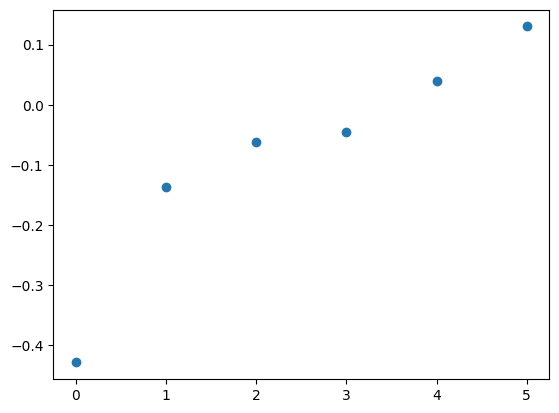

In [29]:
tolerance = 3e-6
reducedStates = []

temp = 1e7
for val in sortedStates:
    if np.abs(val[0]-temp) > tolerance:
        temp = val[0]
        reducedStates.append(temp)

reducedDim = len(reducedStates)

plt.scatter(range(0,reducedDim),reducedStates)

print(reducedDim,reducedStates)